In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pylab import *

In [3]:
df = pd.read_csv('steam.csv')
'; '.join(df.columns)

'appid; name; release_date; english; developer; publisher; platforms; required_age; categories; genres; steamspy_tags; achievements; positive_ratings; negative_ratings; average_playtime; median_playtime; owners; price'

In [3]:
feature = [i for i in df.columns if i not in ['appid', 'name']]
# pd.set_option('display.max_columns', None)
print(feature)

['release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners', 'price']


0-20k        18596
20k-50k       3059
50k-100k      1695
100k-200k     1386
200k-500k     1272
500k-1m        513
1m-2m          288
2m-5m          193
5m-10m          46
10m-20m         21
20m-50m          3
50m-100m         2
100m-200m        1
Name: appid, dtype: int64


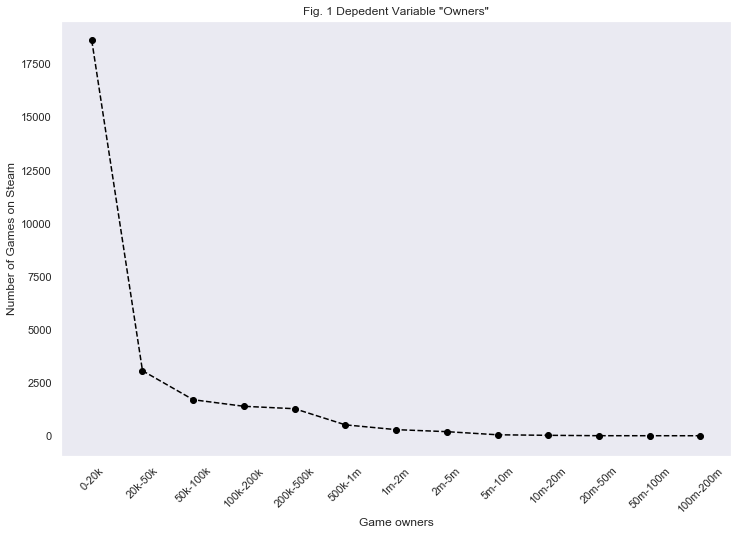

In [44]:
num_feature = ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price']
cat_feature = ['release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags']
cols = ['0-20000', '20000-50000', '50000-100000', '100000-200000', '200000-500000', '500000-1000000', '1000000-2000000', '2000000-5000000', 
        '5000000-10000000', '10000000-20000000', '20000000-50000000', '50000000-100000000', '100000000-200000000']
recols = pd.Series(['0-20k', '20k-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1m', '1m-2m', '2m-5m', '5m-10m', '10m-20m', '20m-50m', 
                    '50m-100m', '100m-200m'])
df['owners'].unique()
f,ax = plt.subplots(figsize=[12,8])
owners = df.groupby(['owners']).count()['appid']
owners = owners.reindex(cols)
owners.index = recols
ax.plot(owners.index,owners.values,'o--',color='black')
ax.tick_params('x',labelrotation=45)
ax.grid()
ax.set_xlabel('Game owners')
ax.set_ylabel('Number of Games on Steam')
ax.set_title('Fig. 1 Depedent Variable "Owners"')
f.savefig('Fig. 1 Owners.jpg',bbox_inches='tight',api=600)
print(owners)

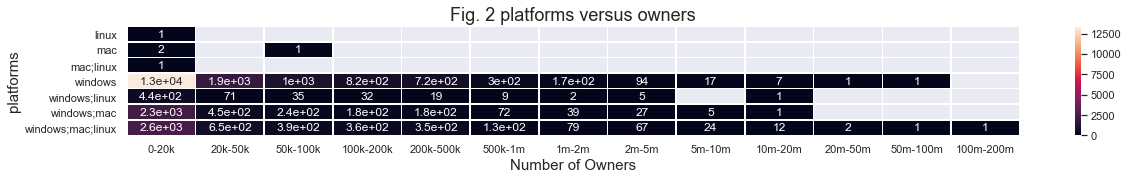

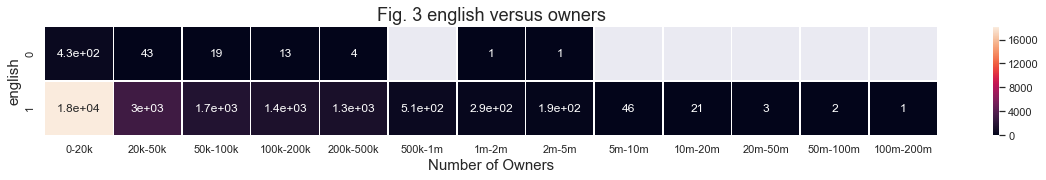

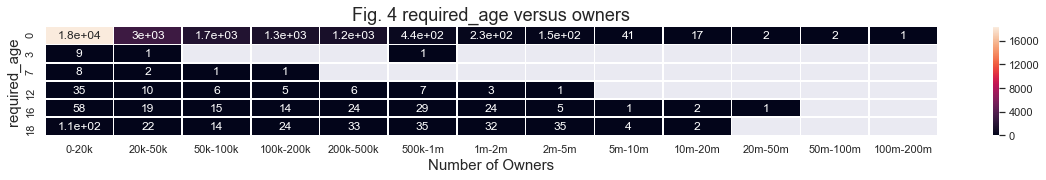

In [37]:
n=2
for feature in ['platforms', 'english', 'required_age']:
    group = df.groupby([feature, 'owners'])['name']
    group = group.count().to_frame()
    fea_owners = group.reset_index()
    fea_owners = fea_owners.pivot(index=feature,columns='owners',values='name')
    fea_owners = fea_owners[cols]
    figure(figsize = (20,2))
    fea_owners.columns = recols
    sns.set()
    ax = sns.heatmap(fea_owners, annot=True, linewidths=.5)
    ax.set_title(f'Fig. {n} '+feature + ' versus owners', fontsize = 18)
    
    ax.set_xlabel('Number of Owners', fontsize = 15)
    ax.set_ylabel(feature, fontsize = 15, rotation = 'vertical')
    plt.savefig(f'Fig. {n} '+feature + ' versus owners.png',bbox_inches='tight')
    n+=1
    plt.show()

In [25]:
df.eval('total_ratings = positive_ratings + negative_ratings', inplace = True)

In [26]:
df.eval('positive_ratio = positive_ratings / total_ratings', inplace  = True)

In [41]:
temp = list(df['owners'])
y = [recols[cols.index(i)] for i in temp]
y

['10m-20m',
 '5m-10m',
 '5m-10m',
 '5m-10m',
 '5m-10m',
 '5m-10m',
 '5m-10m',
 '10m-20m',
 '5m-10m',
 '10m-20m',
 '10m-20m',
 '2m-5m',
 '5m-10m',
 '10m-20m',
 '10m-20m',
 '5m-10m',
 '5m-10m',
 '10m-20m',
 '5m-10m',
 '20m-50m',
 '5m-10m',
 '10m-20m',
 '100m-200m',
 '10m-20m',
 '2m-5m',
 '50m-100m',
 '20k-50k',
 '500k-1m',
 '2m-5m',
 '100k-200k',
 '500k-1m',
 '500k-1m',
 '500k-1m',
 '500k-1m',
 '50k-100k',
 '50k-100k',
 '100k-200k',
 '100k-200k',
 '20k-50k',
 '50k-100k',
 '100k-200k',
 '1m-2m',
 '1m-2m',
 '1m-2m',
 '1m-2m',
 '200k-500k',
 '200k-500k',
 '200k-500k',
 '500k-1m',
 '200k-500k',
 '500k-1m',
 '200k-500k',
 '200k-500k',
 '200k-500k',
 '200k-500k',
 '200k-500k',
 '200k-500k',
 '100k-200k',
 '200k-500k',
 '1m-2m',
 '100k-200k',
 '500k-1m',
 '50k-100k',
 '200k-500k',
 '500k-1m',
 '50k-100k',
 '200k-500k',
 '200k-500k',
 '200k-500k',
 '20k-50k',
 '20k-50k',
 '20k-50k',
 '200k-500k',
 '200k-500k',
 '500k-1m',
 '200k-500k',
 '20k-50k',
 '200k-500k',
 '20k-50k',
 '50k-100k',
 '20k-50k

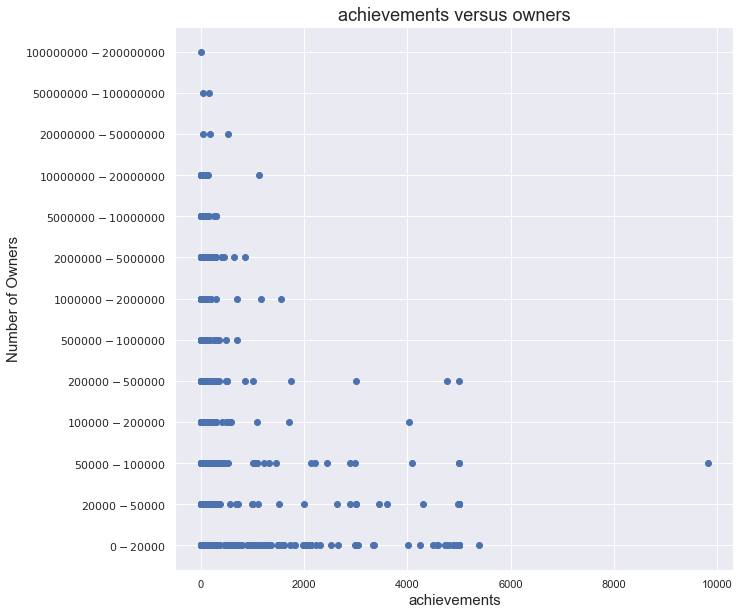

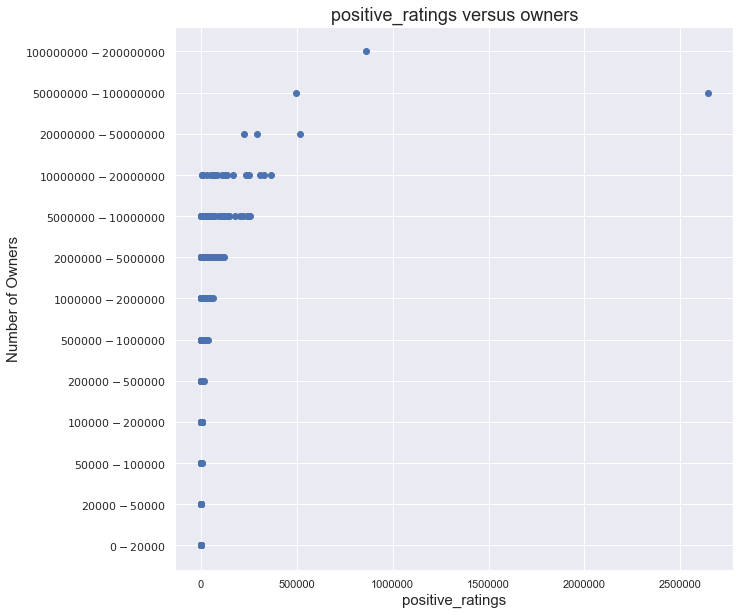

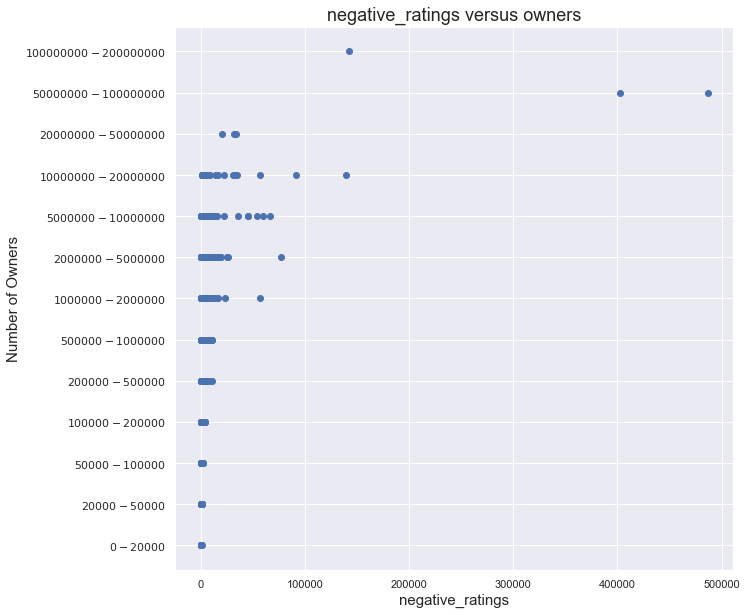

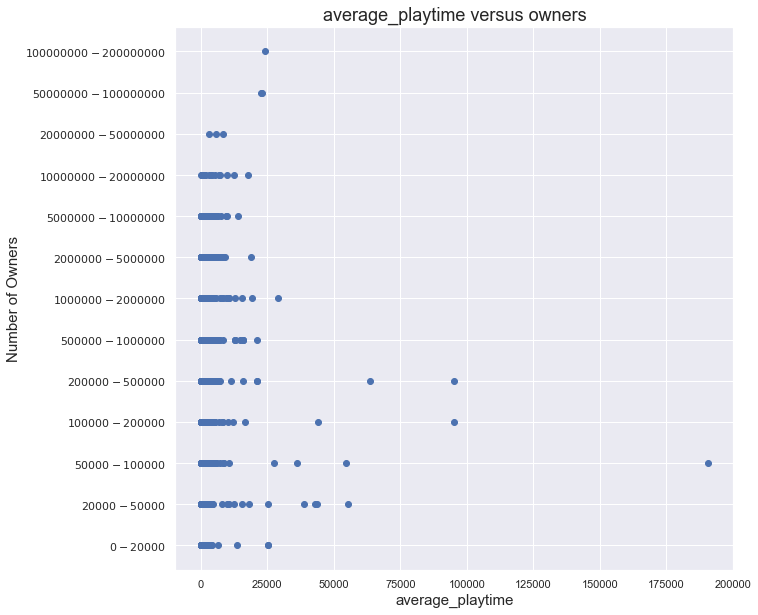

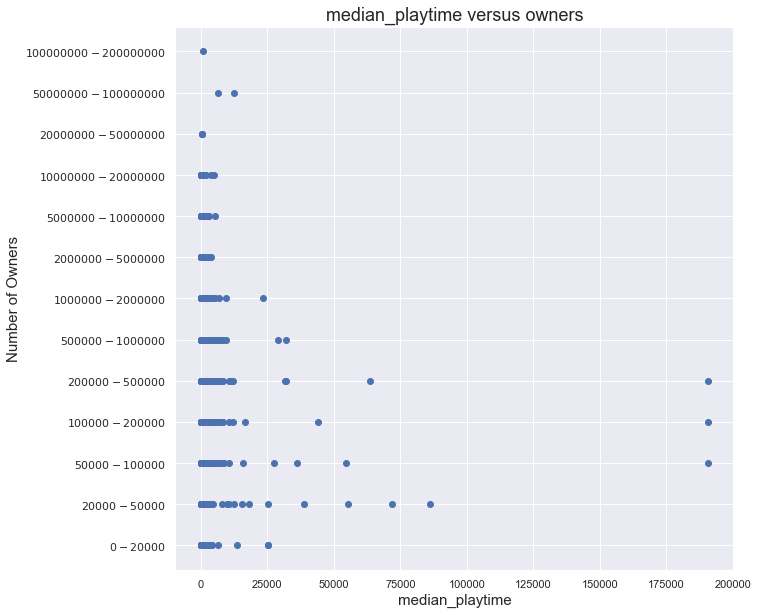

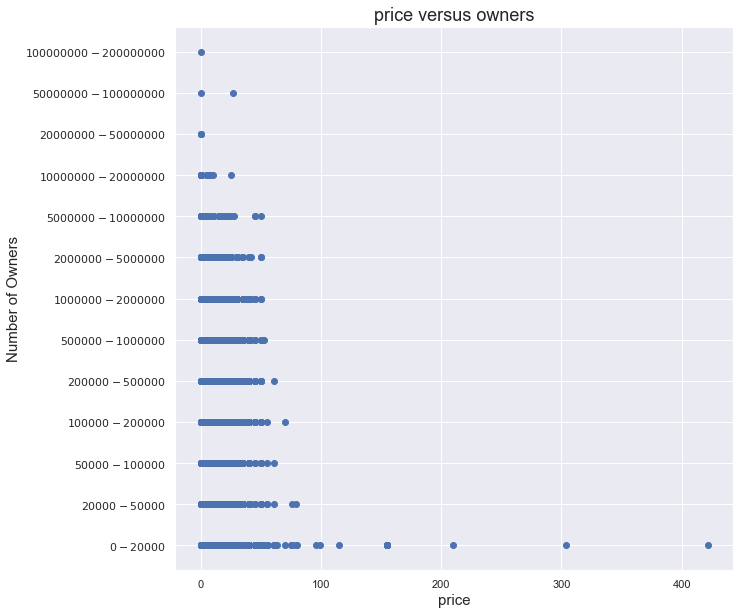

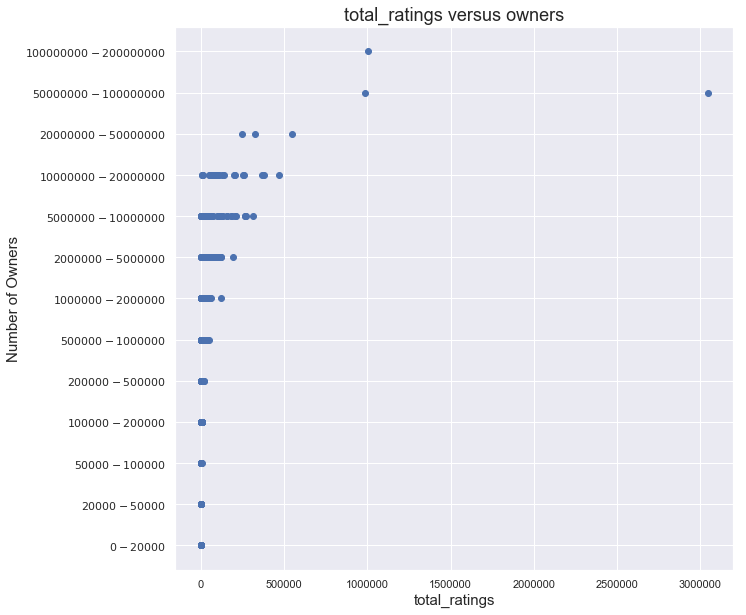

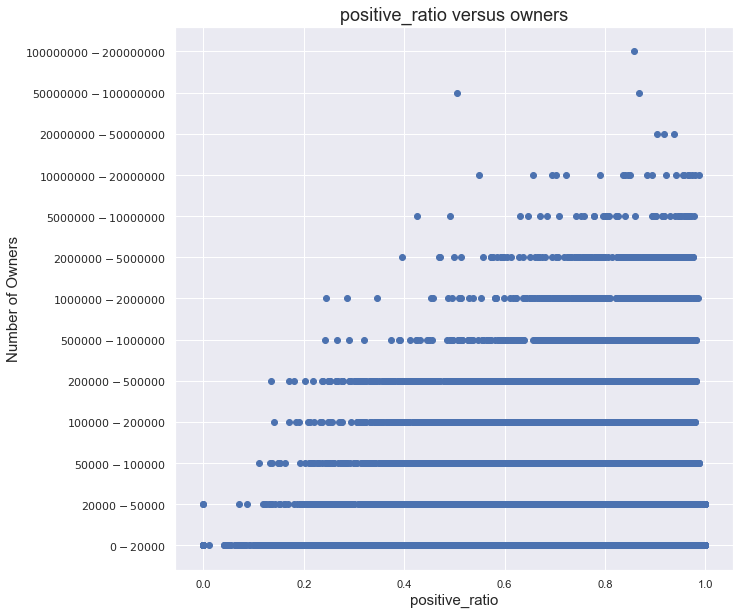

In [73]:
for feature in ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price', 
                'total_ratings', 'positive_ratio']:
    x = list(df[feature])
    figure(figsize = (10, 10))
    plt.scatter(x, y)
    plt.title(feature + ' versus owners', fontsize = 18)
    plt.xlabel(feature, fontsize = 15)
    plt.ylabel('Number of Owners', fontsize = 15)
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               [r'$0-20000$', r'$20000-50000$', r'$50000-100000$', r'$100000-200000$', r'$200000-500000$', r'$500000-1000000$', 
                r'$1000000-2000000$', r'$2000000-5000000$', r'$5000000-10000000$', r'$10000000-20000000$', r'$20000000-50000000$', 
                r'$50000000-100000000$', r'$100000000-200000000$'])
    plt.grid(True)
    plt.savefig(feature + ' versus owners.png')
    plt.show()

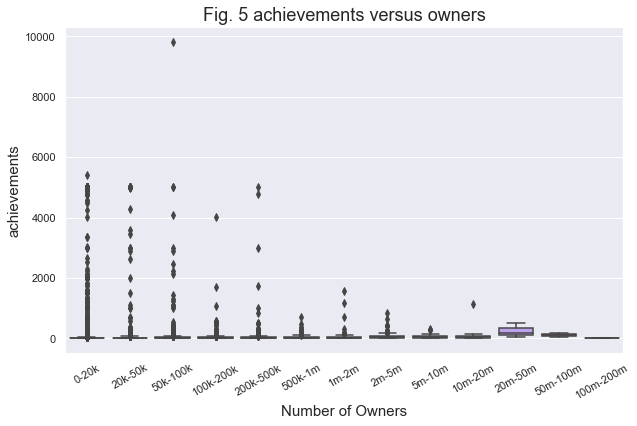

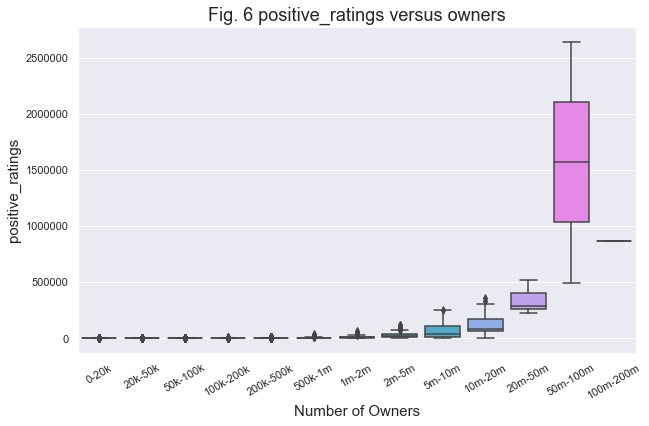

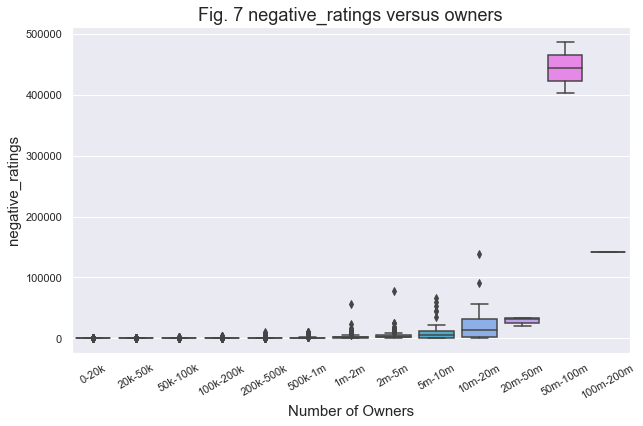

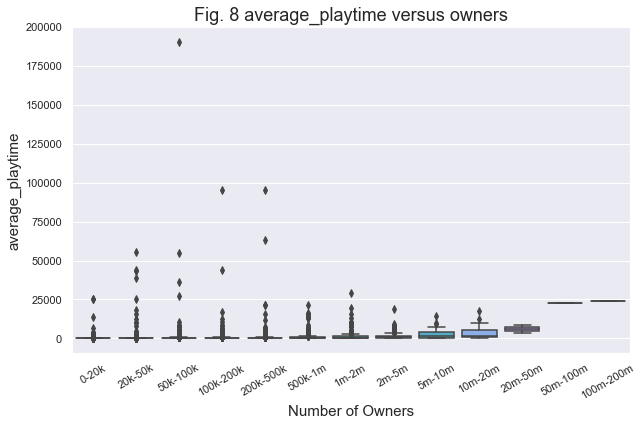

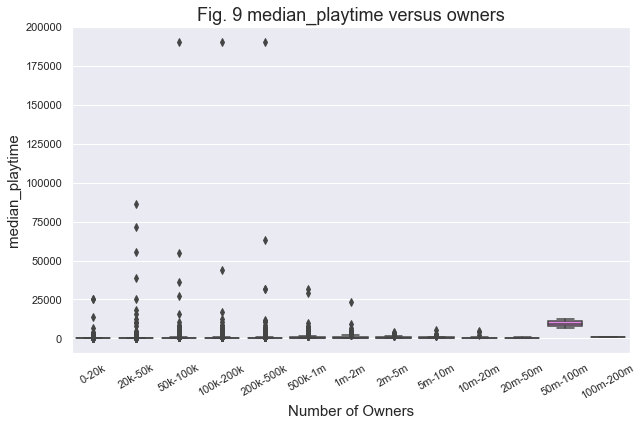

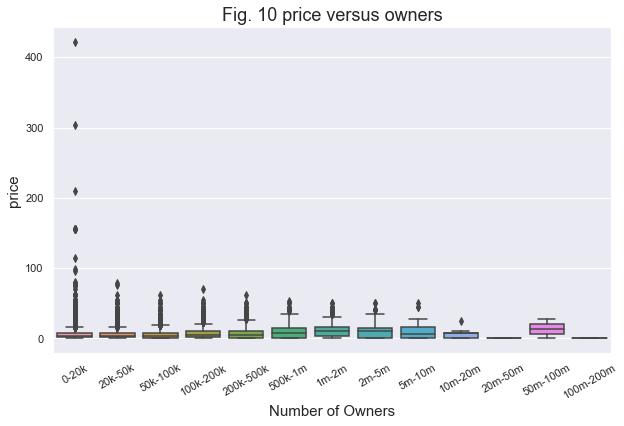

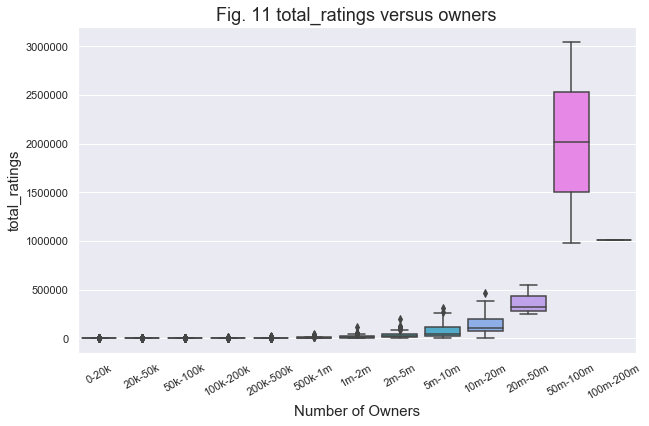

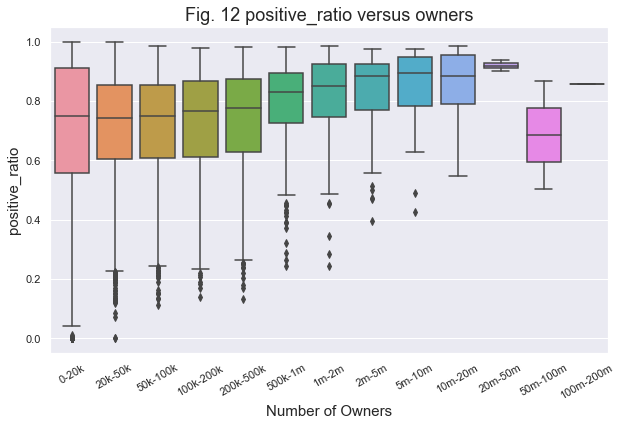

In [43]:
n=5
for feature in ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price', 
                'total_ratings', 'positive_ratio']:
    x = list(df[feature])
    f1, ax = plt.subplots(figsize=(10, 6))
    fig = sns.boxplot(x=y, y=x,order=recols)
    plt.title(f'Fig. {n} ' +feature + ' versus owners', fontsize = 18)
    plt.ylabel(feature, fontsize = 15)
    plt.xlabel('Number of Owners', fontsize = 15)
    plt.xticks(rotation=30)
    plt.savefig(f'Fig. {n} {feature}_plot_box.jpg',bbox_inches='tight')
    n+=1
    plt.show()

In [72]:
# balance data

temp = list(df['owners'])
y = [cols.index(i) for i in temp]
y = np.array(y)
# 3 groups <500k,500k - 1m, >1m
cols = ['0-20000', '20000-50000', '50000-100000', '100000-200000', '200000-500000', '500000-1000000', '1000000-2000000', '2000000-5000000', 
        '5000000-10000000', '10000000-20000000', '20000000-50000000', '50000000-100000000', '100000000-200000000']
recols = pd.Series(['0-20k', '20k-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1m', '1m-2m', '2m-5m', '5m-10m', '10m-20m', '20m-50m', 
                    '50m-100m', '100m-200m'])
new_owners_orders = np.where(y>=6,3,0)
new_owners_str = np.where(y>=6,'>1m','<500k')
new_owners_orders = np.where(y==5,2,new_owners_orders)
new_owners_str = np.where(y==5,'500k-1m',new_owners_str)
df['new_owner_orders'] = new_owners_orders
df['new_owners_str'] = new_owners_str
# number of one group is limited to 554
max_num = df.groupby(['new_owner_orders']).size().min()
df_balanced = df.groupby(['new_owner_orders']).apply(pd.DataFrame.sample, n=max_num).reset_index(drop=True)
df.groupby(['new_owner_orders']).size()

new_owner_orders
0    26008
2      513
3      554
dtype: int64

In [83]:
df_balanced[df_balanced.release_date.astype(np.datetime64)>'2018-07-01'].count().max()

148